# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Kiley Espineira

**ID**: kee45

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [46]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/BEE 4750/hw01-kespineira73`


In [47]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [48]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

ANSWER 

The logic error is found in the minimum value line. 
The minimum value is intially set to 0 when it should be set to either infintity or the first value in the array. 
The minimum value should not be set to 0 as it will only return 0 since no values in the array are less than 0.  

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [49]:
function minimum(array)
    #correction: instead of the minimum value being set to 0, it is set to the first value in the array. This way the code compares all the values present in the array given. 
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [50]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [51]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

ANSWER

The first error in this code is that the team did not actually run the function. They only said "show average_grade" which does not run the function and is an invalid input. 
They must call the function and input student_grades as the arguement. 
Another error is that in the function. The team references "student_grades" which is the specific input, not the general argument for the function. 
This specific input is not defined in the scope of the funtion and should be replaced with the argument "grades" instead of "student_grades."

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [52]:
using Statistics 

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [53]:
@show class_average(student_grades);

class_average(student_grades) = 94.4


### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [54]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

ANSWER 

The purpose of mystery_function is to return an array with only the unique values found in the input. 
If the inputted array of values has repeated numbers, the function is supposed to append those numbers so there are no repeats. 

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [55]:
function mystery_function(values)
    # initialize array of unique values 
    y = []
    # iterate through the inputted array 
    for v in values
        # if the current value v is not in the array y, add it the array y 
        if !(v in y)
            append!(y, v)
        end
    end
    # return the array y of unique values 
    return y
end

# this is the initial testing variable (array with unique and repeated values) and run the function with testing variable as argument 
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

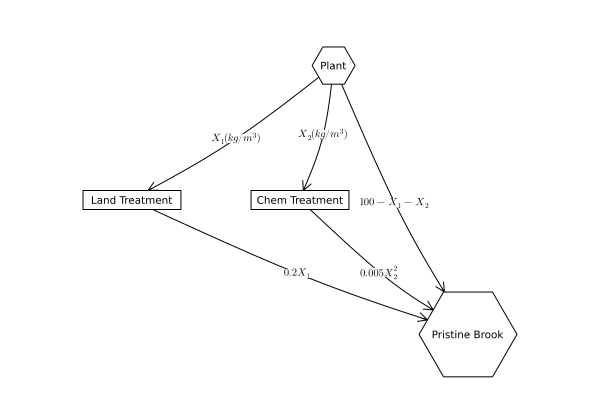

In [56]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
# X1 and X2 refer to the wastewater
# Scaled to account for YUK at 100 kg/day being produced by the plant
edge_labels = Dict((1, 2) => L"X_1 (kg/m^3)", (1,3) => L"X_2 (kg/m^3)", (1, 4) => L"100 - X_1 - X_2",(2, 4) => L"0.2 X_1",(3, 4) => L"0.005 X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

ANSWER

$$C(X_1, X_2) = \frac{X_1^2}{20} + 150X_2 $$

The total cost combines the costs for Method 1: Land Treatment and Method 2: Chemical Treatment. Total Cost =  Method 1 Cost + Method 2 Cost. The units for this equation are [$/day]. 
Note that for the Method 2 Cost portion, the equation needs to be converted to the correct units as the intial cost equation is: $1.50 / m^3 of wastewater treated (X2). This can be adjusted by multiplying by the amount of YUK produced per day by the plant which is 100 kg/day YUK. 

#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [57]:
#this function is an example of how to return two values 
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10


In [58]:
#create a function that determines the final cost and YUK produced 
# C = cost 
# Y = Final YUK concentration 
C = 0
Y = 0 
function yuk_model(x₁, x₂)
   #create an equation to calculate the cost 
    C = ((x₁^2)/20) + (150x₂)

    #create an equation to calculate the final YUK concentration 
    Y = (0.2x₁) + (0.005(x₂^2)) + (100 - x₁ - x₂)

    return (C, Y)
end

#input amount of wastewater being distributed to each treatment method 
#X1 = land disposal 
#X2 = chemical treatment 
X₁ = []
X₂ = []

#create a for loop that goes through possible wastewater amounts and returns values for the final cost and YUK concentration
C = zeros(length(X₁))
Y = zeros(length(X₁))
for i = 1:length(X₁)
    C[i], Y[i] = yuk_model(X₁[i], X₂[i]) 
end

Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [59]:
 #TRIAL 1 
 #input amount of wastewater being distributed to each treatment method 
 X₁ = 80
 X₂ = 20

#call the yuk_model function and run with possible values 
yuk_model(X₁,X₂)
 
 #create a for loop that goes through possible wastewater amounts and returns values for the final cost and YUK concentration
C = zeros(length(X₁))
Y = zeros(length(X₁))
 for i = 1:length(X₁)
     C[i], Y[i] = yuk_model(X₁[i], X₂[i]) 
 end

 @show C; 
 @show Y;

C = [3320.0]
Y = [18.0]


In [60]:
 #TRIAL 2 
 #input amount of wastewater being distributed to each treatment method 
 X₁ = 60
 X₂ = 40

#call the yuk_model function and run with possible values 
yuk_model(X₁,X₂)
 
 #create a for loop that goes through possible wastewater amounts and returns values for the final cost and YUK concentration
C = zeros(length(X₁))
Y = zeros(length(X₁))
 for i = 1:length(X₁)
     C[i], Y[i] = yuk_model(X₁[i], X₂[i]) 
 end

 @show C; 
 @show Y;

C = [6180.0]
Y = [20.0]


In [61]:
 #TRIAL 3 
 #input amount of wastewater being distributed to each treatment method 
 X₁ = 65
 X₂ = 20

#call the yuk_model function and run with possible values 
yuk_model(X₁,X₂)
 
 #create a for loop that goes through possible wastewater amounts and returns values for the final cost and YUK concentration
C = zeros(length(X₁))
Y = zeros(length(X₁))
 for i = 1:length(X₁)
     C[i], Y[i] = yuk_model(X₁[i], X₂[i]) 
 end

 @show C; 
 @show Y;

C = [3211.25]
Y = [30.0]


ANSWER

After running multiple combinations of wastewater charge and treatment variations, it is possible to find combinations that satifies the YUK effluent standard. The YUK effluent standard states that after treatment, the plant can only produce 20 kg/day YUK. In the "yuk_model" function, the "Y" output represents the final YUK concentration disposed in the stream, and the "C" output represents the final cost for both treatment options combined. 

Each trial changes the amount of wastewater being distributed to each treatment method. X1 represents Method 1, the amount of wastewater being treated/disposed through land. X2 represents Method 2, the chemical treatment method. 

Based on the YUK effluent standard, Trial 2 satisfies the standard to an exact measure of producign 20 kg/day YUK. The final cost of this trial is $6,180, a relativley high cost for treatment. In this trial, 60 m3/day wastewater was distributed to Method 1, and 40 m3/day wastewater was distributed to Method 2.

Trial 3 decreases the amount of wastewater being distributed to Method 2 and increases the amount of wastewater being distributed to Method 1 and the stream directly. With this, the cost decreased to $3,211. However, it does not reach the YUK effluent standard as it has a high concentration of 30 kg/day YUK. 

Trial 1 is the best option based on the three different combinations. The final YUK concentration is 18 kg/day YUK, the lowest amount YUK out of the three combinations. Additionally, the cost is considered relatively low at $3,320. 

Therefore, it can be concluded that increasing the amount of wastewater being sent over to Method 1 is the best option as it decreases the cost and final YUK concentration, ideal for the company. To find an optimal solution, the company will need to experiment with different amounts of wastewater being put into each option: Method 1, Method 2, and direct stream. It is also important that the company considers the amount of time it takes for the wastewater to be treated and the amount of resources needed for each method when deciding the best solution. 

BEST SOLUTION: TRIAL 1

Final Cost: $3,320 

Final YUK Concentration: 18 kg/day 

## References

List any external references consulted, including classmates.